<a href="https://colab.research.google.com/github/arddhanaza/foodprint-bangkit-capstone/blob/machine_learning/Model_Training_Capstone_food_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
root_path = '/drive/MyDrive/datasets'
DIR_DATA = '/content/drive/MyDrive/datasets/food_11/food_11/images'


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf
print(tf.__version__)
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as note_book_tqdm

note_book_tqdm.pandas(desc='progress: ')

2.4.1


/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [6]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [7]:
#Downloading the Assets 
!kaggle datasets download  trolukovich/food11-image-dataset -p /content/drive/MyDrive/datasets/food_11/
# !kaggle datasets list -s food41

 99% 1.08G/1.08G [00:26<00:00, 38.8MB/s]
100% 1.08G/1.08G [00:26<00:00, 43.9MB/s]


In [9]:
# #Save the assets
import os
import zipfile
zip_target = '/content/drive/MyDrive/datasets/food_11/food11-image-dataset.zip'
zip_ref = zipfile.ZipFile(zip_target,'r')
zip_ref.extractall('/content/drive/MyDrive/datasets/food_11/food11')
zip_ref.close()


In [ ]:
import os
# !cp -r '/content/gdrive/MyDrive/datasets/food101/food41/images/' '/tmp/images'
# !mkdir '/tmp/images/images/test'

In [ ]:
# import pandas as pd

# df_train = pd.read_csv('/content/drive/MyDrive/datasets/food101/food41/meta/train.txt', header=None, sep='/', names=['label','name'])
# df_test = pd.read_csv('/content/drive/MyDrive/datasets/food101/food41/meta/test.txt', header=None, sep='/', names=['label','name'])
# label_df = pd.read_csv('/content/drive/MyDrive/datasets/food101/food41/meta/classes.txt', header=None, sep='/', names=['label'])

# df_test

,label,name
0,apple_pie,1011328
1,apple_pie,101251
2,apple_pie,1034399
3,apple_pie,103801
4,apple_pie,1038694
...,...,...
25245,waffles,942009
25246,waffles,954028
25247,waffles,96181
25248,waffles,97015


In [ ]:
# #Separate Assets into Training and Testing
# TOTAL_TRAIN = df_train.shape[0]
# TOTAL_TEST = df_train.shape[0]
# TOTAL_CLASS = label_df.shape[0]

# IMG_H = 200
# IMG_W = 200
# DATA_SETS = '/content/drive/MyDrive/datasets/food101/food41/images'

# EPOCHS = 20
# BATCH_SIZE = 32

# SEED = 23
# def make_path(row):
#   return f'{DATA_SETS}/{row["label"]}/{row["name"]}.jpg'

# df_train.loc[:,'path'] = df_train.progress_apply(make_path, axis =1)
# df_test.loc[:,'path'] = df_test.progress_apply(make_path,axis=1)

In [ ]:
# label_mapper = dict(zip(df_train['label'].unique(), np.arange(len(df_train['label'].unique()))))
# df_train['label_index'] = df_train['label'].map(label_mapper)
# df_test['label_index'] = df_train['label'].map(label_mapper)

In [ ]:
# df_test['path'][0]

'/content/drive/MyDrive/datasets/food101/food41/images/apple_pie/1011328.jpg'

<function matplotlib.pyplot.show>

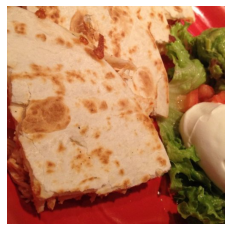

In [11]:
#Show the Image

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

img = mpimg.imread('/content/drive/MyDrive/datasets/food_11/food11/evaluation/Bread/0.jpg')
plt.imshow(img)
plt.axis('Off')
plt.show


In [13]:
#Make a Model

training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(
    directory = '/content/drive/MyDrive/datasets/food_11/food11/training/',
    target_size=(150,150),
    batch_size=32,
    shuffle=True,
    class_mode="categorical"
)

validation_generator = validation_datagen.flow_from_directory(
    directory = '/content/drive/MyDrive/datasets/food_11/food11/validation/',
    target_size=(150,150),
    batch_size=32,
    shuffle=True,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    directory = '/content/drive/MyDrive/datasets/food_11/food11/evaluation/',
    target_size=(150,150),
    batch_size=32,
    shuffle=True,
    class_mode="categorical"
)

Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.
Found 3347 images belonging to 11 classes.


In [24]:
#Learn a Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(64, (3,3),padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  
  tf.keras.layers.Conv2D(256, (3,3),padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(256, (3,3),padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),


  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512,activation='relu'),
  tf.keras.layers.Dense(11,activation='softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 18, 18, 256)      

In [25]:
#Testing
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
# history = model.fit(train_generator, epochs=EPOCHS, steps_per_epoch=10,validation_data=test_generator,verbose=1,validation_steps=3)
history = model.fit(train_generator, epochs=100, steps_per_epoch=100,validation_data=validation_generator,verbose=1,validation_steps=5)



Epoch 1/100
100/100 [==============================] - 45s 434ms/step - loss: 2.6520 - accuracy: 0.1377 - val_loss: 2.2547 - val_accuracy: 0.1750
Epoch 2/100
100/100 [==============================] - 41s 414ms/step - loss: 2.2815 - accuracy: 0.1626 - val_loss: 2.2269 - val_accuracy: 0.1813
Epoch 3/100
100/100 [==============================] - 43s 433ms/step - loss: 2.2155 - accuracy: 0.2160 - val_loss: 2.3053 - val_accuracy: 0.2188
Epoch 4/100
100/100 [==============================] - 42s 422ms/step - loss: 2.1597 - accuracy: 0.2398 - val_loss: 2.4887 - val_accuracy: 0.1375
Epoch 5/100
100/100 [==============================] - 42s 424ms/step - loss: 2.0959 - accuracy: 0.2681 - val_loss: 2.6986 - val_accuracy: 0.1063
Epoch 6/100
100/100 [==============================] - 43s 430ms/step - loss: 2.0307 - accuracy: 0.2803 - val_loss: 2.0439 - val_accuracy: 0.2500
Epoch 7/100
100/100 [==============================] - 42s 421ms/step - loss: 1.9833 - accuracy: 0.2995 - val_loss: 1.8876 -

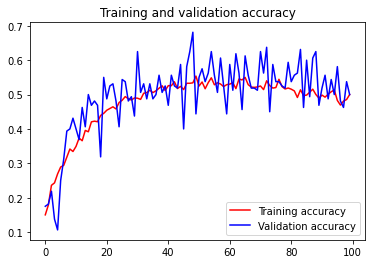

<Figure size 432x288 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [27]:
# model.save('model_1_food11')

INFO:tensorflow:Assets written to: model_1_food11/assets
